In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.utils import util

In [6]:
input_parent_dir = config.machine.dir_02
sca_dirnames = [os.path.basename(d) for d in glob(os.path.join(input_parent_dir, 'sca*')) if os.path.isdir(d)]
scas = sorted([int(d[3:]) for d in sca_dirnames])
scas = [str(sca).zfill(2) for sca in scas]

lens_list, subhalo_list = [], []
for sca in tqdm(scas):
    input_dir = os.path.join(input_parent_dir, f'sca{sca}')

    lenses = util.unpickle_all(input_dir, prefix='lens_with_subhalos_')
    lens_list.extend(lenses)

    subhalo_dir = os.path.join(input_dir, 'subhalos')
    subhalos = util.unpickle_all(subhalo_dir, prefix='subhalo_realization_')
    subhalo_list.extend(subhalos)

100%|██████████| 18/18 [00:10<00:00,  1.71it/s]


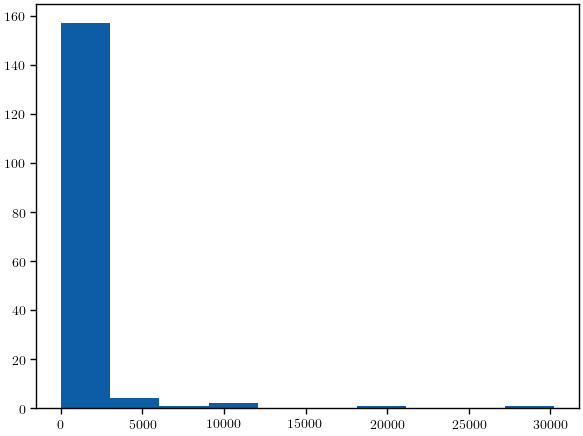

In [9]:
subhalo_count = [l.num_subhalos for l in lens_list]

plt.hist(subhalo_count)
plt.show()

realization contains 2028 halos.


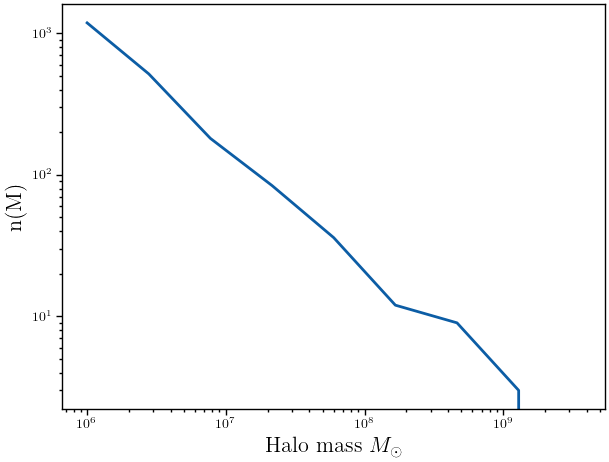

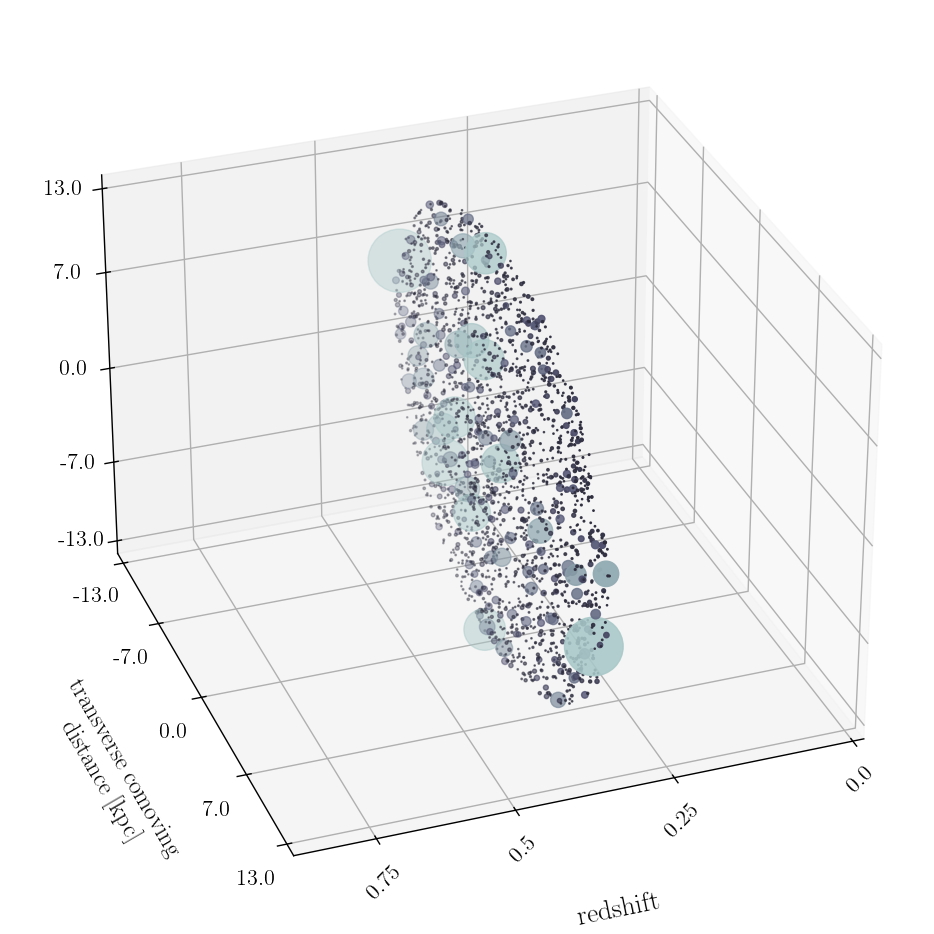

In [20]:
sample_realization = np.random.choice(subhalo_list)

print('realization contains '+str(len(sample_realization.halos))+' halos.')
cdm_halo_masses = [halo.mass for halo in sample_realization.halos]
N, m = np.histogram(cdm_halo_masses, bins=np.logspace(6, 10, 10))

fig = plt.figure(1)
ax = plt.subplot(111)
ax.loglog(m[0:-1], N)
ax.set_xlabel('Halo mass '+r'$M_{\odot}$', fontsize=16)
ax.set_ylabel('n(M)', fontsize=16)

fig = plt.figure(2)
fig.set_size_inches(14,12)
ax = plt.subplot(111, projection='3d')
sample_realization.plot(ax)